In [1]:
# Basic Libraries
%matplotlib inline 
import time
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from urllib.request import urlopen 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from collections import OrderedDict  
data_path = r"C:\Users\jethr\ICPSR_36404-V2\ICPSR_36404\DS0001\36404-0001-Data.tsv"
sb.set() # set the default Seaborn style for graphics

https://www.datacamp.com/community/tutorials/deep-learning-python#preprocess

https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely

https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b

In [2]:
def build_df(filename):
    df = pd.read_csv(data_path, header=0, sep="\t")
    return df

In [3]:
df = build_df(data_path)
print(df.dtypes)

C:\Users\jethr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ABT_INMATE_ID        object
SEX                   int64
ADMTYPE               int64
OFFGENERAL            int64
EDUCATION             int64
ADMITYR               int64
RELEASEYR             int64
MAND_PRISREL_YEAR    object
PROJ_PRISREL_YEAR    object
PARELIG_YEAR         object
SENTLGTH             object
OFFDETAIL             int64
RACE                  int64
AGEADMIT              int64
AGERELEASE           object
TIMESRVD              int64
RELTYPE              object
STATE                 int64
dtype: object


In [4]:
df.replace(" ", np.nan, inplace=True)

In [5]:
df.head()

,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
0,A012015000000091071,1,1,2,9,2006,2010,NaN,NaN,NaN,4,10,9,3,3,2,3,1
1,A022015000000096906,1,3,3,9,2008,2008,NaN,NaN,NaN,0,12,1,3,3,0,NaN,2
2,A042015000000118649,1,1,1,9,2013,2014,2014,2014,NaN,0,6,1,1,1,0,1,4
3,A062015000000167469,1,2,2,9,1996,1996,NaN,NaN,NaN,2,7,1,2,2,0,1,6
4,A132015000000550479,1,1,1,9,1968,1972,1978,NaN,NaN,3,4,1,1,1,2,1,13


In [5]:
#df = df.convert_objects(convert_numeric=True)
#df.head()

C:\Users\jethr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [6]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10907333, 18)


ABT_INMATE_ID              0
SEX                        0
ADMTYPE                    0
OFFGENERAL                 0
EDUCATION                  0
ADMITYR                    0
RELEASEYR                  0
MAND_PRISREL_YEAR    7209317
PROJ_PRISREL_YEAR    4662333
PARELIG_YEAR         8148769
SENTLGTH               20063
OFFDETAIL                  0
RACE                       0
AGEADMIT                   0
AGERELEASE           1200886
TIMESRVD                   0
RELTYPE              1809372
STATE                      0
dtype: int64


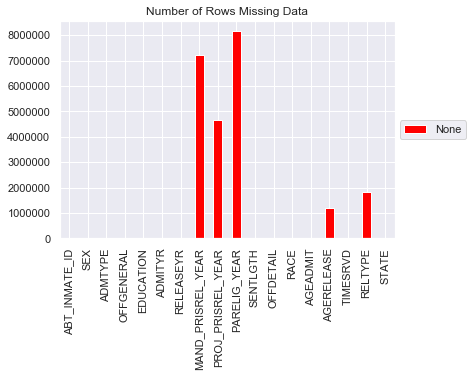

In [7]:
missing_data = df.isnull().sum()
print(missing_data)
missing_data.plot(kind='bar', color='Red', title="Number of Rows Missing Data", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

As we can see from the above graph, most of the missing data are related to the year when the prisoner is going to be released. For example, some columns such as PARELIG_YEAR are missing almost 80% of their values. Therefore, we cannot impute the values in these columns as more data is missing than available. It is best that we drop all missing values. 

In [8]:
complete_rows = df.dropna()

In [9]:
complete_rows.head()


,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,A182015000000019353,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,A442015000000038143,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,A042015000000273326,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,A042015000000190084,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,A042015000000224709,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


In [10]:
complete_rows['MAND_PRISREL_YEAR'] = complete_rows['MAND_PRISREL_YEAR'].astype(str).astype(int)
complete_rows['PROJ_PRISREL_YEAR'] = complete_rows['PROJ_PRISREL_YEAR'].astype(str).astype(int)
complete_rows['PARELIG_YEAR'] = complete_rows['PARELIG_YEAR'].astype(str).astype(int)
complete_rows['AGERELEASE'] = complete_rows['AGERELEASE'].astype(str).astype(int)
complete_rows['RELTYPE'] = complete_rows['RELTYPE'].astype(str).astype(int)
complete_rows['SENTLGTH'] = complete_rows['SENTLGTH'].astype(str).astype(int)

C:\Users\jethr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jethr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jethr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [11]:
print(complete_rows.dtypes)

ABT_INMATE_ID        object
SEX                   int64
ADMTYPE               int64
OFFGENERAL            int64
EDUCATION             int64
ADMITYR               int64
RELEASEYR             int64
MAND_PRISREL_YEAR     int32
PROJ_PRISREL_YEAR     int32
PARELIG_YEAR          int32
SENTLGTH              int32
OFFDETAIL             int64
RACE                  int64
AGEADMIT              int64
AGERELEASE            int32
TIMESRVD              int64
RELTYPE               int32
STATE                 int64
dtype: object


In [12]:
print(len(complete_rows))

720189


As can be seen, eventhough we have dropped more than 90% of the data, we are still left with 720K rows which is more than enough to work with. 

In [13]:
complete_rows.head()

,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,A182015000000019353,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,A442015000000038143,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,A042015000000273326,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,A042015000000190084,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,A042015000000224709,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


Since the data file contains one record for each separate term in prison. An individual person may have more than one record, but all will be assigned the same Abt_Inmate_ID value. Thus, we iterate through the dataset to find deuplicate copies of Abt_Inmate_ID value which indicates that the felony has recommited a crime. We will mark 0 as non-repeated offender and 1 as repeated offender. 

In [14]:
repeat = complete_rows.set_index('ABT_INMATE_ID').index.duplicated(keep=False) #If the index is duplicated, TRUE, else FALSE
repeat = repeat * 1 #Change true and false to 1 and 0.


In [15]:
recividism = [x + 0 for x in repeat] #add 1 to all the numbers in repeat.
se = pd.Series(recividism)
complete_rows.insert(0, 'recidivism', se.values) #insert this row inside
#it will be binary from now on

In [18]:
complete_rows.head()

,recidivism,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,A182015000000019353,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,1,A442015000000038143,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,0,A042015000000273326,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,0,A042015000000190084,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,0,A042015000000224709,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


In [16]:
complete_rows.drop('ABT_INMATE_ID', axis=1, inplace = True)


C:\Users\jethr\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
complete_rows.head()

,recidivism,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,1,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,0,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,0,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,0,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


Now I remove all the rows that have "missing"

In [18]:
complete_rows = complete_rows[complete_rows.RELEASEYR != 9999]
complete_rows = complete_rows[complete_rows.ADMTYPE != 9]
complete_rows = complete_rows[complete_rows.OFFGENERAL != 9]
complete_rows = complete_rows[complete_rows.ADMITYR != 9999]
complete_rows = complete_rows[complete_rows.OFFDETAIL != 99]
complete_rows = complete_rows[complete_rows.RACE != 9]
complete_rows = complete_rows[complete_rows.AGEADMIT != 9]
complete_rows.drop('EDUCATION', axis=1, inplace=True) # missing all values
complete_rows = complete_rows[complete_rows.MAND_PRISREL_YEAR != 9999]
complete_rows = complete_rows[complete_rows.MAND_PRISREL_YEAR != 9993]
complete_rows = complete_rows[complete_rows.PROJ_PRISREL_YEAR != 9999]
complete_rows = complete_rows[complete_rows.PARELIG_YEAR != 9999]
complete_rows = complete_rows[complete_rows.OFFDETAIL != 9]
complete_rows = complete_rows[complete_rows.SENTLGTH != 9]
complete_rows = complete_rows[complete_rows.AGERELEASE != 9]
complete_rows = complete_rows[complete_rows.RELTYPE != 9]

complete_rows2 represent shanon random forest data while complete_rows represent ann

In [19]:
complete_rows.head()
complete_rows2 = complete_rows.copy()

Applying StandardScaler for continuous variables (only applicable to neural network dataset)

In [20]:
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
columns = ['ADMITYR', 'RELEASEYR', 'MAND_PRISREL_YEAR', 'PROJ_PRISREL_YEAR', 'PARELIG_YEAR']
for i in columns:
    # load data
    data = complete_rows[i].values.reshape(-1,1)
    # create scaler
    scaler = StandardScaler()
    # fit and transform in one step
    complete_rows[i] = scaler.fit_transform(data)

In [21]:
complete_rows.head(10)

,recidivism,SEX,ADMTYPE,OFFGENERAL,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,2,3,3,0.281023,0.018399,-0.046774,-0.097914,0.015980,2,12,1,2,2,0,1,18
23,1,1,1,3,0.071847,-0.270770,-0.099855,-0.159550,-0.050625,1,12,2,4,4,1,2,44
287979,0,1,1,2,1.117729,1.175077,0.032847,0.148631,0.149188,3,10,1,5,5,1,1,4
404424,0,1,1,1,1.117729,1.464246,0.059387,0.210267,0.182490,3,1,1,4,4,1,1,4
488157,0,1,2,1,1.117729,1.175077,0.032847,0.148631,0.082584,4,3,1,5,5,0,1,4
491650,0,1,1,1,1.117729,1.464246,0.032847,0.148631,0.149188,3,3,1,3,3,1,1,4
743263,0,1,2,2,-1.392387,-2.294955,0.245169,-0.529367,0.382303,2,7,3,2,2,1,1,6
2086862,0,2,2,1,0.490200,0.018399,-0.073314,-0.406095,-0.117229,2,5,2,4,4,0,2,6
2942323,0,2,2,2,0.699376,0.596738,-0.020234,-0.221186,0.215792,2,11,1,3,3,0,1,6
3075560,0,1,1,1,1.326905,1.464246,0.085927,0.271903,0.182490,2,6,3,2,2,0,1,8


In [25]:
complete_rows2.head(10)

,recidivism,SEX,ADMTYPE,OFFGENERAL,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,2,3,3,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,1,1,1,3,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,0,1,1,2,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,0,1,1,1,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,0,1,2,1,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4
491650,0,1,1,1,2012,2014,2013,2013,2013,3,3,1,3,3,1,1,4
743263,0,1,2,2,2000,2001,2021,2002,2020,2,7,3,2,2,1,1,6
2086862,0,2,2,1,2009,2009,2009,2004,2005,2,5,2,4,4,0,2,6
2942323,0,2,2,2,2010,2011,2011,2007,2015,2,11,1,3,3,0,1,6
3075560,0,1,1,1,2013,2014,2015,2015,2014,2,6,3,2,2,0,1,8


In [22]:
#to check for class imbalance in data set
def print_data_perc(data_frame, col):
    """Function used to print class distribution"""
    try:
        # Stores value counts
        col_vals = data_frame[col].value_counts()
        # Resets index to make index a column in data frame
        col_vals = col_vals.reset_index()
        # If the number of unique instances in column exceeds 20 print warning
        if len(col_vals['index']) > 20:
            print('Warning: values in column are more than 20 \nPlease try a column with lower value counts!')
        # Else it calculates/prints percentage for each unique value in column
        else:
            # Create a function to output the percentage
            f = lambda x, y: 100 * (x / sum(y))
            for i in range(0, len(col_vals['index'])):
                print('{0} accounts for {1:.2f}% of the {2} column'\
                      .format(col_vals['index'][i],
                              f(col_vals[col].iloc[i],
                                col_vals[col]),
                              col))
    # try-except block goes here if it can't find the column in data frame
    except KeyError as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')

In [23]:
print_data_perc(complete_rows, 'recidivism') 

0 accounts for 54.45% of the recidivism column
1 accounts for 45.55% of the recidivism column


In [24]:
print_data_perc(complete_rows2, 'recidivism') 

0 accounts for 54.45% of the recidivism column
1 accounts for 45.55% of the recidivism column


X1,y1 are the datasets for neural network. X2,y2 are datasets for random forsest.

In [25]:
X1 = complete_rows.iloc[:, 1:17]
y1 = complete_rows.iloc[:, 0:1]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

For random forest

In [32]:
X2 = complete_rows2.iloc[:, 1:17]
y2 = complete_rows2.iloc[:, 0:1]

In [33]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [52]:
print('Train1', X_train.shape, y_train.shape)
print('Test1', X_test.shape, y_test.shape)
print('Train2', X_train2.shape, y_train2.shape)
print('Test2', X_test2.shape, y_test2.shape)

Train1 (462720, 16) (462720, 1)
Test1 (198309, 16) (198309, 1)
Train2 (462720, 16) (462720, 1)
Test2 (198309, 16) (198309, 1)


Sigmoid and tanh should not be used as activation function for the hidden layer. This is because of the vanishing gradient problem, i.e., if your input is on a higher side (where sigmoid goes flat) then the gradient will be near zero. This will cause very slow or no learning during backpropagation as weights will be updated with really small values.

Detailed explanation here: http://cs231n.github.io/neural-networks-1/#actfun

The best function for hidden layers is thus ReLu.

In [47]:
import keras
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer of one-dimensional array with 16 elements for input. (Thus no need to flattenlayer) It would produce 32 outputs in return
model.add(Dense(32, activation='relu', input_shape=(16,)))

# model.add(Flatten)

# Add one hidden layer 
model.add(Dense(64, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(256, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid')) #activation: "relu", research more on this.


In [48]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 44,257
Trainable params: 44,257
Non-trainable params: 0
_________________________________________________________________


[array([[-0.34725985, -0.26796392,  0.19133362, -0.0082956 ,  0.18560699,
         -0.2757014 ,  0.13014922,  0.0088231 ,  0.03502056, -0.2534188 ,
         -0.3287015 ,  0.22540721, -0.00048023,  0.11353526, -0.00843865,
         -0.09774089,  0.12399265, -0.00791213,  0.35135826,  0.21712717,
         -0.3150149 ,  0.33533034,  0.18751594, -0.12687145,  0.07926574,
         -0.24029723,  0.12354842, -0.2801996 , -0.20412856, -0.2159972 ,
         -0.12815651,  0.3068848 ],
        [ 0.10845765, -0.15505682, -0.2228716 ,  0.10886252,  0.3120105 ,
          0.21951875, -0.27855712,  0.27674785, -0.04796985, -0.02036259,
         -0.10476105,  0.10845345,  0.2958155 ,  0.3035539 , -0.13119623,
         -0.2042196 ,  0.13037345,  0.2795554 ,  0.0711014 , -0.02116624,
          0.3033279 ,  0.01935443, -0.0460462 ,  0.16581377, -0.04636195,
          0.27713928, -0.02633646,  0.031919  ,  0.18486044,  0.29874602,
          0.28021762,  0.10787898],
        [ 0.2993103 ,  0.33007672,  0.09

In [49]:
# An epoch is a single pass through the entire training set, followed by testing of the verification set. 
#The batch size that you specify in the code above defines the number of samples that going to be propagated through the network. 
#Also, by doing this, you optimize the efficiency because you make sure that you don’t load too many input patterns into memory at the same time.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   


In [ ]:
#https://datascience.stackexchange.com/questions/38955/how-does-the-validation-split-parameter-of-keras-fit-function-work

tensorboard --logdir ./Graph
http://localhost:6006

In [51]:
#It is the parameter specifying how big chunk of training data will be used for validation. It’s a float value between 0 and 1. Validation data is not used for the training, but to evaluate the loss and the accuracy.

#For example: validation_split=0.3 will cause that 30% of the training data will be used for validation
model.fit(X_train, y_train,epochs=15, batch_size=64, verbose=1, callbacks=[keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)])

Epoch 1/15
212096/462720 [============>.................] - ETA: 6s - loss: 0.4489 - accuracy: 0.7771

KeyboardInterrupt: 

In [50]:
model.fit(X_train, y_train,epochs=15, batch_size=64, verbose=1)

Epoch 1/15
462720/462720 [==============================] - 12s 27us/step - loss: 0.5440 - accuracy: 0.7118
Epoch 2/15
462720/462720 [==============================] - 12s 26us/step - loss: 0.4924 - accuracy: 0.7481
Epoch 3/15
462720/462720 [==============================] - 15s 32us/step - loss: 0.4795 - accuracy: 0.7564
Epoch 4/15
462720/462720 [==============================] - 13s 27us/step - loss: 0.4724 - accuracy: 0.7617
Epoch 5/15
462720/462720 [==============================] - 13s 28us/step - loss: 0.4674 - accuracy: 0.7650
Epoch 6/15
462720/462720 [==============================] - 13s 28us/step - loss: 0.4635 - accuracy: 0.7667
Epoch 7/15
462720/462720 [==============================] - 13s 29us/step - loss: 0.4610 - accuracy: 0.7692
Epoch 8/15
462720/462720 [==============================] - 13s 27us/step - loss: 0.4588 - accuracy: 0.7702
Epoch 9/15
462720/462720 [==============================] - 13s 29us/step - loss: 0.4568 - accuracy: 0.7711
Epoch 10/15
462720/462720 [=

Customized Score for NN

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
def my_custom_loss_func(y_test, y_pred):
    rounded = [round(x[0]) for x in y_pred]
    return accuracy_score(y_test, rounded)

In [86]:
my_custom_loss_func(y_test, model.predict(X_test))

0.7642567911693368

In [87]:
from sklearn.metrics import make_scorer
score = make_scorer(my_custom_loss_func, greater_is_better=False)

# Using Permutation Importance for feature selection for NN (Not sure if this is recommended)

In [88]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring = score, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
-0.0009 ± 0.0001,RACE
-0.0031 ± 0.0001,SEX
-0.0040 ± 0.0003,RELTYPE
-0.0045 ± 0.0003,AGEADMIT
-0.0051 ± 0.0003,AGERELEASE
-0.0117 ± 0.0004,SENTLGTH
-0.0132 ± 0.0008,TIMESRVD
-0.0148 ± 0.0006,PROJ_PRISREL_YEAR
-0.0153 ± 0.0003,OFFGENERAL
-0.0202 ± 0.0006,OFFDETAIL


In [89]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring = 'r2', random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.5026 ± 0.0020,PARELIG_YEAR
0.3455 ± 0.0007,ADMITYR
0.3104 ± 0.0013,RELEASEYR
0.2874 ± 0.0014,STATE
0.1007 ± 0.0005,ADMTYPE
0.0617 ± 0.0008,MAND_PRISREL_YEAR
0.0533 ± 0.0008,OFFDETAIL
0.0397 ± 0.0008,PROJ_PRISREL_YEAR
0.0388 ± 0.0006,OFFGENERAL
0.0293 ± 0.0005,SENTLGTH


In [32]:
y_pred = model.predict(X_test)
y_pred

array([[3.1625623e-01],
       [1.2840831e-01],
       [9.7689277e-01],
       ...,
       [2.0350030e-04],
       [5.3015143e-01],
       [7.1049219e-01]], dtype=float32)

In [33]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

198309/198309 [==============================] - 4s 18us/step
[0.4598554443326957, 0.7699297666549683]


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
rounded = [round(x[0]) for x in y_pred]
# Confusion matrix
confusion_matrix(y_test, rounded)

array([[92716, 15191],
       [30434, 59968]], dtype=int64)

In [35]:
# Accuracy 
accuracy_score(y_test, rounded)

0.7699297560877217

In [48]:
# Precision 
precision_score(y_test, rounded)

0.7910351784138192

In [49]:
# Recall
recall_score(y_test, rounded)

0.6939780093360767

In [50]:
# F1 score
f1_score(y_test, rounded)

0.7393348731969455

In [51]:
# Cohen's kappa
cohen_kappa_score(y_test, rounded)

0.5458241424003043

# Random Forest Classifier

In [35]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500, oob_score=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train2,y_train2)



C:\Users\jethr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
feat_labels = ['SEX','ADMTYPE','OFFGENERAL','ADMITYR','RELEASEYR','MAND_PRISREL_YEAR','PROJ_PRISREL_YEAR','PARELIG_YEAR','SENTLGTH','OFFDETAIL','RACE','AGEADMIT','AGERELEASE','TIMESRVD','RELTYPE','STATE']
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('SEX', 0.014771441073150779)
('ADMTYPE', 0.038969775300355856)
('OFFGENERAL', 0.033716834543972715)
('ADMITYR', 0.08735530265147028)
('RELEASEYR', 0.07026354303488089)
('MAND_PRISREL_YEAR', 0.08202167797714842)
('PROJ_PRISREL_YEAR', 0.06838442595914573)
('PARELIG_YEAR', 0.13401973787417334)
('SENTLGTH', 0.04529650639831325)
('OFFDETAIL', 0.07117848767801681)
('RACE', 0.04570902656849937)
('AGEADMIT', 0.042784155405744095)
('AGERELEASE', 0.04378351502376401)
('TIMESRVD', 0.07167858481021518)
('RELTYPE', 0.020939625907742638)
('STATE', 0.12912735979340656)


# Using selectfromModel for feature selection

In [37]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf)

# Train the selector
sfm.fit(X_train2, y_train2.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500, n_jobs=None,
                                                 oob_score=True,
                                                 random_state=None, verbose=0,
   

In [38]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

ADMITYR
RELEASEYR
MAND_PRISREL_YEAR
PROJ_PRISREL_YEAR
PARELIG_YEAR
OFFDETAIL
TIMESRVD
STATE


In [39]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train2)
X_important_test = sfm.transform(X_test2)

In [40]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=500, oob_score=True)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

C:\Users\jethr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_pred2=clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.7659460740561447


In [54]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (8 Features) Model
accuracy_score(y_test, y_important_pred)

Accuracy: 0.7660469267658049


In [ ]:
print(clf.score(X_train2, y_train2))

In [ ]:
print(clf.oob_score_)

In [ ]:
print(clf.score(X_test2,y_test2))

In [51]:
from rfpimp import *
imp = importances(model, X_test2, y_test2) # permutation
viz = plot_importances(imp)
viz.view()

# # Decision Tree Classifier 

In [65]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 7)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred = clf.predict(X_test2)

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred))

Accuracy: 0.7243947576761519


In [71]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat_labels,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtree.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Finding the optimized max_depth

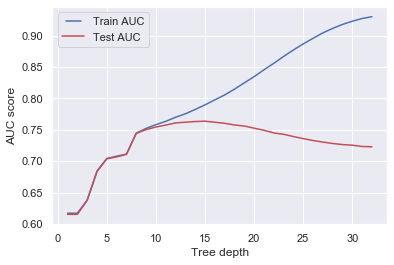

In [60]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train2,y_train2)
   train_pred = dt.predict(X_train2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train2, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
#As can be seen, max_depth 7 is the most optimum (intersect)

SelectfromModel used for decision tree classfication

In [72]:
sfm = SelectFromModel(clf)

# Train the selector
sfm.fit(X_train2, y_train2.values.ravel())

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None,
                                                 criterion='gini', max_depth=7,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort=False,
                                                 random_state=None,
                                                 splitter='best'),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [73]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

ADMTYPE
RELEASEYR
PARELIG_YEAR
TIMESRVD
STATE


# Using features selected from Random Forrest and Decision Tree on NN

In [36]:
X3 = complete_rows[['ADMITYR','RELEASEYR','MAND_PRISREL_YEAR','PROJ_PRISREL_YEAR','PARELIG_YEAR','OFFDETAIL','TIMESRVD','STATE']]
y3 = complete_rows.iloc[:, 0:1]
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [37]:
# Initialize the constructor
model = Sequential()

# Add an input layer of one-dimensional array with 16 elements for input. (Thus no need to flattenlayer) It would produce 32 outputs in return
model.add(Dense(32, activation='relu', input_shape=(8,)))

# model.add(Flatten)

# Add one hidden layer 
model.add(Dense(64, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(256, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid')) #activation: "relu", research more on this.

In [38]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 44,001
Trainable params: 44,001
Non-trainable params: 0
_________________________________________________________________


[array([[ 2.83643723e-01, -2.24532545e-01, -7.41958618e-02,
          2.76281357e-01,  1.14810467e-01,  3.60356033e-01,
          2.77477562e-01,  7.46526718e-02,  2.71164834e-01,
          5.64962924e-02,  5.24864793e-02, -2.81626105e-01,
         -2.14528620e-01, -1.43984303e-01,  2.89943159e-01,
          1.45634294e-01, -3.37419420e-01, -8.67455900e-02,
         -2.58563757e-01,  5.47110140e-02,  2.24864244e-01,
         -8.46435726e-02,  5.23769557e-02, -3.41237187e-01,
         -1.08476311e-01, -3.57581764e-01,  5.09346426e-02,
          3.47224653e-01, -2.73198307e-01,  3.28019500e-01,
         -3.08550715e-01, -2.47525543e-01],
        [-3.15719098e-01,  7.85872340e-02,  1.97000802e-02,
          7.15740919e-02, -1.96667090e-01, -3.39884430e-01,
         -6.71288669e-02, -2.73657054e-01,  7.85797834e-03,
          1.30249023e-01,  7.67363012e-02,  3.60350072e-01,
         -3.82085711e-01,  1.01685971e-01,  2.74816751e-01,
         -2.14836389e-01,  8.48891139e-02,  3.15833747e-

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
model.fit(X_train3, y_train3, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
462720/462720 [==============================] - 12s 25us/step - loss: 0.4820 - accuracy: 0.7502
Epoch 2/15
462720/462720 [==============================] - 12s 26us/step - loss: 0.4814 - accuracy: 0.7505
Epoch 3/15
462720/462720 [==============================] - 13s 28us/step - loss: 0.4806 - accuracy: 0.7514
Epoch 4/15
462720/462720 [==============================] - 13s 28us/step - loss: 0.4796 - accuracy: 0.7524
Epoch 5/15
462720/462720 [==============================] - 13s 27us/step - loss: 0.4787 - accuracy: 0.7524
Epoch 6/15
462720/462720 [==============================] - 12s 26us/step - loss: 0.4781 - accuracy: 0.7529
Epoch 7/15
462720/462720 [==============================] - 12s 26us/step - loss: 0.4776 - accuracy: 0.7534
Epoch 8/15
462720/462720 [==============================] - 13s 28us/step - loss: 0.4771 - accuracy: 0.7533
Epoch 9/15
462720/462720 [==============================] - 13s 29us/step - loss: 0.4768 - accuracy: 0.7538
Epoch 10/15
462720/462720 [=

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3
rounded2 = [round(x[0]) for x in y_pred3]
# Confusion matrix
confusion_matrix(y_test3, rounded2)

In [ ]:
# Accuracy 
accuracy_score(y_test3, rounded)

In [ ]:
ADMITYR
RELEASEYR
MAND_PRISREL_YEAR
PROJ_PRISREL_YEAR
PARELIG_YEAR
OFFDETAIL
TIMESRVD
STATE

https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3


https://www.datacamp.com/community/tutorials/decision-tree-classification-python